# Quantification of Tabula Muris Senis and Tabula Sapiens public datasets with custom genome containing protein-coding and miRNA genes

## STEP 0. Load required packages

In [117]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

## scanpy
import anndata as ad
import scanpy as sc

## basics
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sb

## single-cell related
import scvelo as scv

import time # for the sleep function
import os # to iterate over directories
import logging

In [118]:
## R dependencies
import re
from rpy2.robjects import pandas2ri
import rpy2.rinterface_lib.callbacks
import rpy2
%load_ext rpy2.ipython

import anndata2ri

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [119]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
# Automatically convert rpy2 outputs to pandas dataframes
rpy2.robjects.numpy2ri.activate()
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython
# autoreload
%load_ext autoreload
%autoreload 

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
## other 
plt.rcParams['figure.figsize']=(5,5) #rescale figures
sc.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
sc.logging.print_versions()

-----
anndata     0.9.2
scanpy      1.9.3
-----
PIL                         9.5.0
anndata2ri                  1.1
asttokens                   NA
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
cffi                        1.15.0
colorama                    0.4.4
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.3
executing                   0.8.2
h5py                        3.6.0
igraph                      0.10.8
ipykernel                   6.7.0
ipython_genutils            0.2.0
jedi                        0.18.1
jinja2                      3.0.3
joblib                      1.1.0
jupyter_server              1.13.3
kiwisolver                  1.4.4
leidenalg                   0.10.1
llvmlite                    0.38.0
markupsafe                  2.0.1
matplotli

## STEP 1. Read in anndata object

In [121]:
path2files="path"

In [123]:
adata=scv.read(path2files+'0_tms_genes_primirnas_intragenic_062022.h5ad')

#human '0_TS_spleen_human.h5ad'

In [125]:
## Select tissue for further analysis
selTissue="Spleen"

In [126]:
adata=adata[adata.obs["tissue"]==selTissue,:]

In [128]:
selSpecies="mouse"
tissue='tissue'
donor='donor'

In [129]:
adata.obs

filenames  \
X                                                         
AAACCTGAGGAGCGAG-1-10X_P1_2_primirs    10X_P1_2_primirs   
AAACCTGCAGTCAGAG-1-10X_P1_2_primirs    10X_P1_2_primirs   
AAACCTGCATAAAGGT-1-10X_P1_2_primirs    10X_P1_2_primirs   
AAACCTGGTCTAGCCG-1-10X_P1_2_primirs    10X_P1_2_primirs   
AAACCTGGTTTAGGAA-1-10X_P1_2_primirs    10X_P1_2_primirs   
...                                                 ...   
TTTGTCACAGCTCGAC-1-10X_P5_11_primirs  10X_P5_11_primirs   
TTTGTCACAGCTCGCA-1-10X_P5_11_primirs  10X_P5_11_primirs   
TTTGTCAGTCATCGGC-1-10X_P5_11_primirs  10X_P5_11_primirs   
TTTGTCATCGCCTGAG-1-10X_P5_11_primirs  10X_P5_11_primirs   
TTTGTCATCTACTTAC-1-10X_P5_11_primirs  10X_P5_11_primirs   

                                                        newnames  \
X                                                                  
AAACCTGAGGAGCGAG-1-10X_P1_2_primirs    10X_P1_2_AAACCTGAGGAGCGAG   
AAACCTGCAGTCAGAG-1-10X_P1_2_primirs    10X_P1_2_AAACCTGCAGTCAGAG   
AAACCTGCATAAAGGT-1-10X_P1_2_primirs    10X_P1_2_AAACCTGCATAAAGGT   
AAACCTGGTCTAGCCG-1-10X_P1_2_primirs    10X_P1_2_AAACCTGGTCTAGCCG   
AAACCTGGTTTAGGAA-1-10X_P1_2_primirs    10X_P1_2_AAACCTGGTTTAGGAA   
...                                                          ...   
TTTGTCACAGCTCGAC-1-10X_P5_11_primirs  10X_P5_11_TTTGTCACAGCTCGAC   
TTTGTCACAGCTCGCA-1-10X_P5_11_primirs  10X_P5_11_TTTGTCACAGCTCGCA   
TTTGTCAGTCATCGGC-1-10X_P5_11_primirs  10X_P5_11_TTTGTCAGTCATCGGC   
TTTGTCATCGCCTGAG-1-10X_P5_11_primirs  10X_P5_11_TTTGTCATCGCCTGAG   
TTTGTCATCTACTTAC-1-10X_P5_11_primirs  10X_P5_11_TTTGTCATCTACTTAC   

                                                  cell      group  age  \
X                                                                        
AAACCTGAGGAGCGAG-1-10X_P1_2_primirs   AAACCTGAGGAGCGAG   10X_P1_2  30m   
AAACCTGCAGTCAGAG-1-10X_P1_2_primirs   AAACCTGCAGTCAGAG   10X_P1_2  30m   
AAACCTGCATAAAGGT-1-10X_P1_2_primirs   AAACCTGCATAAAGGT   10X_P1_2  30m   
AAACCTGGTCTAGCCG-1-10X_P1_2_primirs   AAACCTGGTCTAGCCG   10X_P1_2  30m   
AAACCTGGTTTAGGAA-1-10X_P1_2_primirs   AAACCTGGTTTAGGAA   10X_P1_2  30m   
...                                                ...        ...  ...   
TTTGTCACAGCTCGAC-1-10X_P5_11_primirs  TTTGTCACAGCTCGAC  10X_P5_11   1m   
TTTGTCACAGCTCGCA-1-10X_P5_11_primirs  TTTGTCACAGCTCGCA  10X_P5_11   1m   
TTTGTCAGTCATCGGC-1-10X_P5_11_primirs  TTTGTCAGTCATCGGC  10X_P5_11   1m   
TTTGTCATCGCCTGAG-1-10X_P5_11_primirs  TTTGTCATCGCCTGAG  10X_P5_11   1m   
TTTGTCATCTACTTAC-1-10X_P5_11_primirs  TTTGTCATCTACTTAC  10X_P5_11   1m   

                                                       cell_ontology_class  \
X                                                                            
AAACCTGAGGAGCGAG-1-10X_P1_2_primirs                            plasma cell   
AAACCTGCAGTCAGAG-1-10X_P1_2_primirs                            granulocyte   
AAACCTGCATAAAGGT-1-10X_P1_2_primirs   macrophage dendritic cell progenitor   
AAACCTGGTCTAGCCG-1-10X_P1_2_primirs                            granulocyte   
AAACCTGGTTTAGGAA-1-10X_P1_2_primirs                            granulocyte   
...                                                                    ...   
TTTGTCACAGCTCGAC-1-10X_P5_11_primirs                            macrophage   
TTTGTCACAGCTCGCA-1-10X_P5_11_primirs                                T cell   
TTTGTCAGTCATCGGC-1-10X_P5_11_primirs                                B cell   
TTTGTCATCGCCTGAG-1-10X_P5_11_primirs                                B cell   
TTTGTCATCTACTTAC-1-10X_P5_11_primirs                      mature NK T cell   

                                     mouse.id  n_genes   sex  tissue  \
X                                                                      
AAACCTGAGGAGCGAG-1-10X_P1_2_primirs    30-M-2   2533.0  male  Spleen   
AAACCTGCAGTCAGAG-1-10X_P1_2_primirs    30-M-2   2152.0  male  Spleen   
AAACCTGCATAAAGGT-1-10X_P1_2_primirs    30-M-2   2563.0  male  Spleen   
AAACCTGGTCTAGCCG-1-10X_P1_2_primirs    30-M-2   1242.0 

In [130]:
## Select species and rewrite keys

if selSpecies=='human':
    tissue= adata.obs['organ_tissue']
    donor=adata.obs['donor'] 
elif selSpecies=='mouse':
    tissue=adata.obs['tissue']
    donor=adata.obs['mouse.id']
    
set(tissue)

In [132]:
adata

View of AnnData object with n_obs × n_vars = 35528 × 30777
    obs: 'filenames', 'newnames', 'cell', 'group', 'age', 'cell_ontology_class', 'mouse.id', 'n_genes', 'sex', 'tissue', 'n_counts', 'louvain', 'leiden'
    var: 'gene_ids', 'feature_types'

## STEP 2.Plot the higher expressed genes in each sample

In [ ]:
# Check each sample individually 
conditionnames=donor.unique()

In [136]:
conditionnames

['30-M-2', '18-F-51', '21-F-54', '18-F-50', '30-M-4', ..., '3-M-8', '30-M-3', '24-M-59', '24-M-58', '1-M-63']
Length: 13
Categories (13, object): ['1-M-63', '3-F-56', '3-M-8', '18-F-50', ..., '30-M-2', '30-M-3', '30-M-4', '30-M-5']

In [137]:
tissue.value_counts()

Spleen    35528
Name: tissue, dtype: int64

In [138]:
conditionnames

['30-M-2', '18-F-51', '21-F-54', '18-F-50', '30-M-4', ..., '3-M-8', '30-M-3', '24-M-59', '24-M-58', '1-M-63']
Length: 13
Categories (13, object): ['1-M-63', '3-F-56', '3-M-8', '18-F-50', ..., '30-M-2', '30-M-3', '30-M-4', '30-M-5']

In [139]:
conditionlength = len(conditionnames)

In [140]:
len(donor.value_counts().unique())


13

Sample name: {:d} 30-M-2
normalizing counts per cell
    finished (0:00:00)
Sample name: {:d} 18-F-51
normalizing counts per cell
    finished (0:00:00)
Sample name: {:d} 21-F-54
normalizing counts per cell
    finished (0:00:00)
Sample name: {:d} 18-F-50
normalizing counts per cell
    finished (0:00:00)
Sample name: {:d} 30-M-4
normalizing counts per cell
    finished (0:00:00)
Sample name: {:d} 3-F-56
normalizing counts per cell
    finished (0:00:00)
Sample name: {:d} 30-M-5
normalizing counts per cell
    finished (0:00:00)
Sample name: {:d} 21-F-55
normalizing counts per cell
    finished (0:00:00)
Sample name: {:d} 3-M-8
normalizing counts per cell
    finished (0:00:00)
Sample name: {:d} 30-M-3
normalizing counts per cell
    finished (0:00:00)
Sample name: {:d} 24-M-59
normalizing counts per cell
    finished (0:00:00)
Sample name: {:d} 24-M-58
normalizing counts per cell
    finished (0:00:00)
Sample name: {:d} 1-M-63
normalizing counts per cell
    finished (0:00:00)


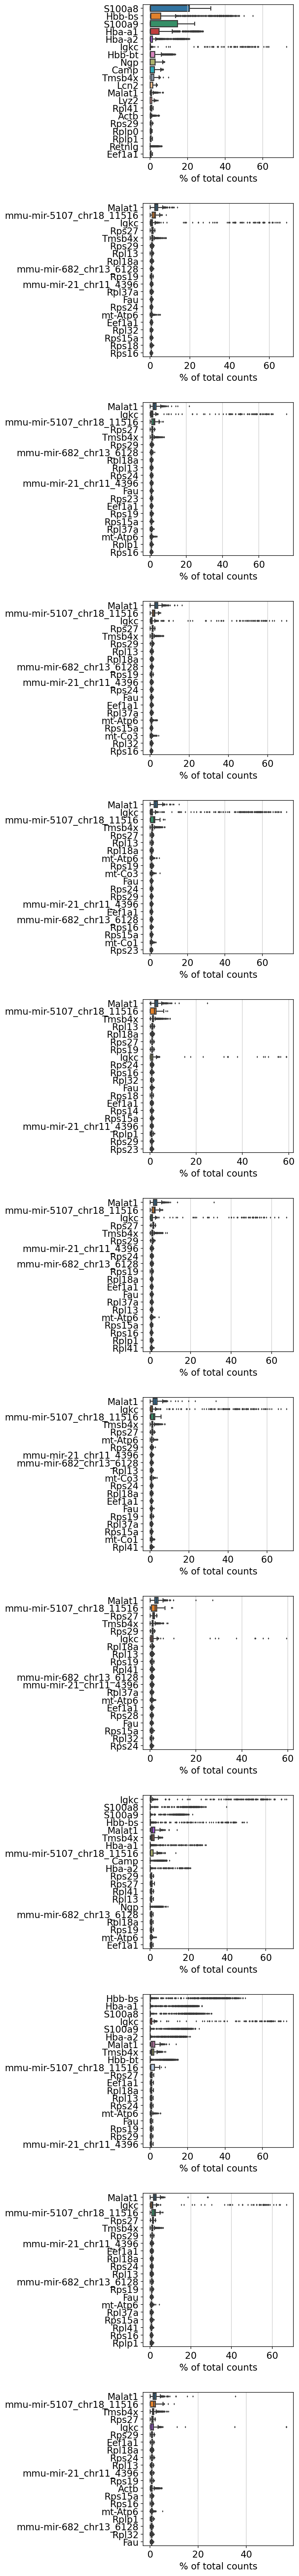

In [141]:
# Plot the higher expressed genes in each sample, in plt.subplots(x,y, figsize=(7,55)), replace 'x' with the number of samples
if selSpecies=='human':
    fig_size = 20
elif selSpecies=='mouse':
    fig_size = 55
    
fig,ax = plt.subplots(len(donor.value_counts().unique()),1, figsize=(7,fig_size))

for file in list(range(0, conditionlength)):
    print('Sample name: {:d}', conditionnames[file])
    sc.pl.highest_expr_genes(adata[donor==conditionnames[file]], n_top=20, ax=ax[file],show=False) 
plt.tight_layout(pad=3.0)
plt.show()
## repeat this plot after filtering

In [142]:
# Store the full data set in 'raw' as log-normalised data for statistical testing
adata.raw=sc.pp.log1p(adata, copy=True)

Show those genes that yield the highest fraction of counts in each single cell, across all cells.

## STEP 3. Plots for filtering decisions
These plots are just an aid for setting the actual filtering parameters (set in one of the first cells of this notebook for convenience)



In [143]:
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)

mito_genes = [name for name in adata.var_names if name.startswith('Mt-') or name.startswith('mt-')]
adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1

# same could be done for example ribosomal genes
ribo_genes = [name for name in adata.var_names if name.startswith('Rp')]
adata.obs['percent_ribo'] = np.sum(adata[:, ribo_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1

# add primirna and gene counts
primirnas = [name for name in adata.var_names if name.startswith('mmu-') or name.startswith('ENSMUSG')]


adata.obs['percent_pri'] = np.sum(adata[:, primirnas].X, axis=1).A1 / np.sum(adata.X, axis=1).A1

# add the total counts per cell as observations-annotation to adata

adata.obs['n_counts'] = adata.X.sum(axis=1).A1
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

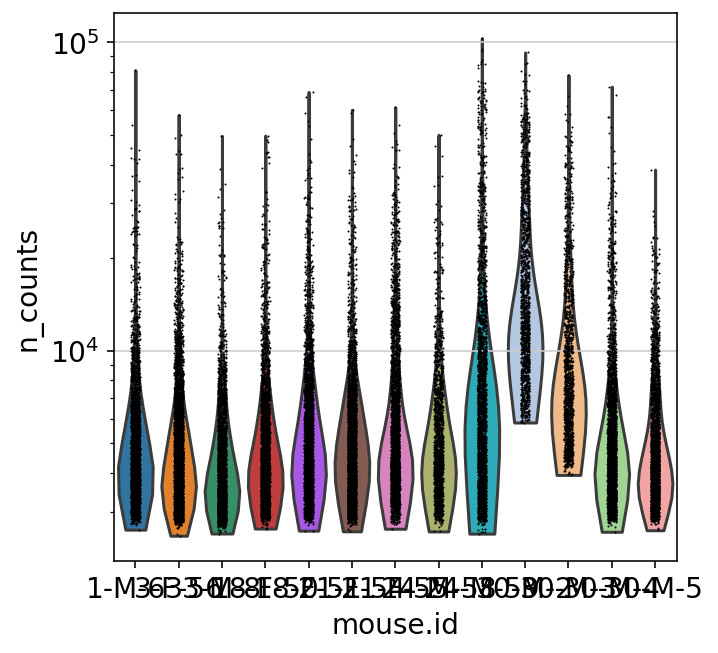

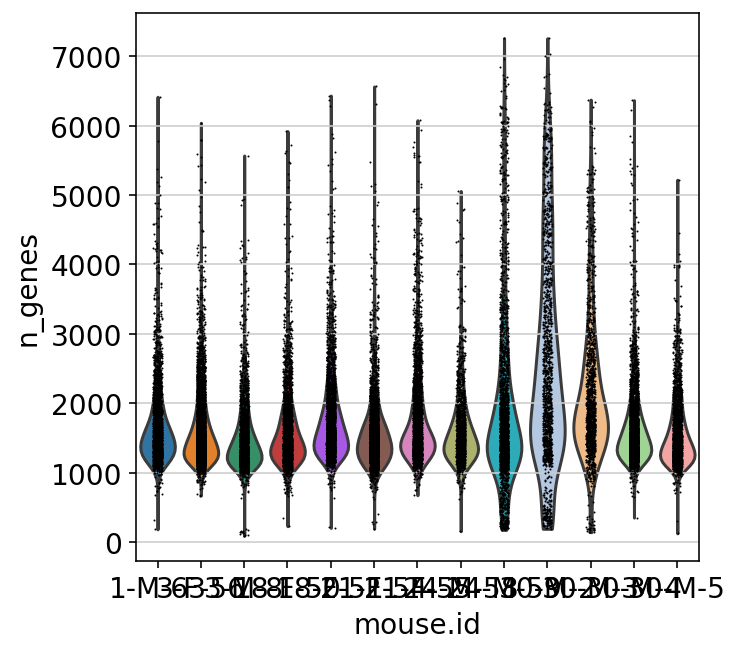

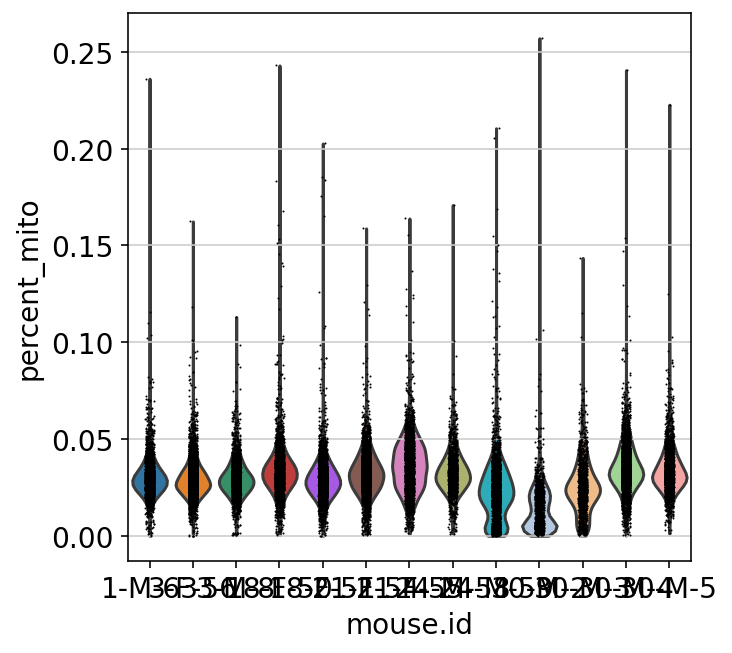

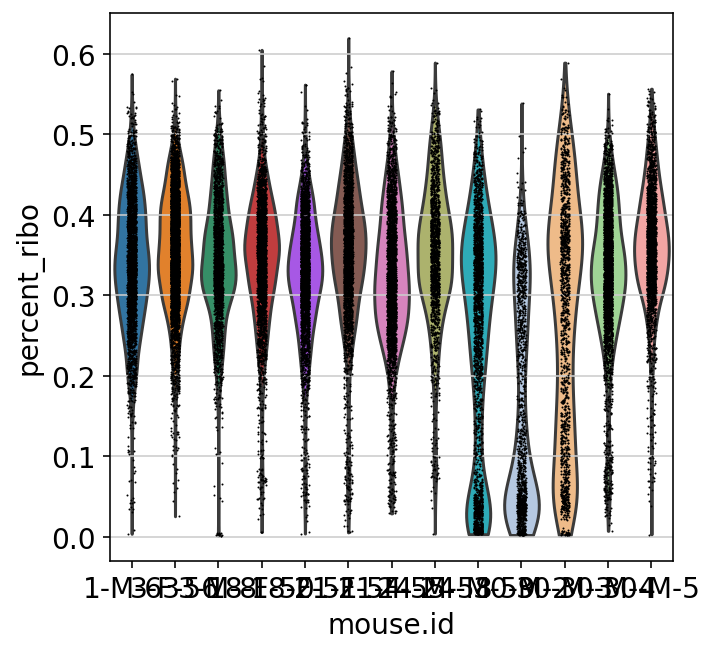

In [144]:
t1 = sc.pl.violin(adata, 'n_counts', groupby='mouse.id',size=1,  log=True, cut=0)
t = sc.pl.violin(adata, ['n_genes'], groupby ="mouse.id",show=False)
t2 = sc.pl.violin(adata, 'percent_mito', groupby='mouse.id')
t3 = sc.pl.violin(adata, ['percent_ribo'],  groupby ="mouse.id", show=False)

## STEP 4. Filtering


In [145]:
#Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

#sc.pp.filter_cells(adata, min_counts = 1500)
#print('Number of cells after min count filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 40000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['percent_mito'] < 0.25]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

#adata = adata[adata.obs['percent_ribo'] > 0.1]
#print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 500)
print('Number of cells after gene filter: {:d}'.format(adata.n_obs))

Total number of cells: 35528
filtered out 340 cells that have more than 40000 counts
Number of cells after max count filter: 35188
Number of cells after MT filter: 35187
filtered out 285 cells that have less than 500 genes expressed
Number of cells after gene filter: 34902


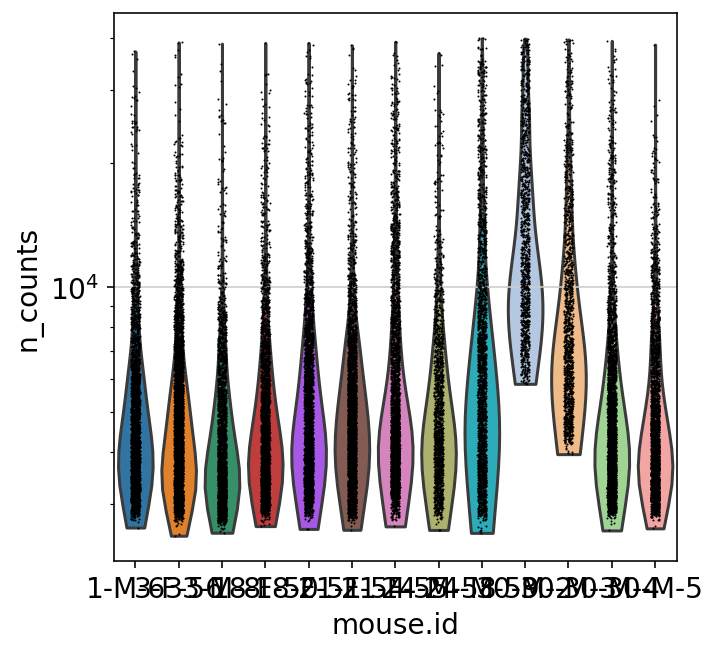

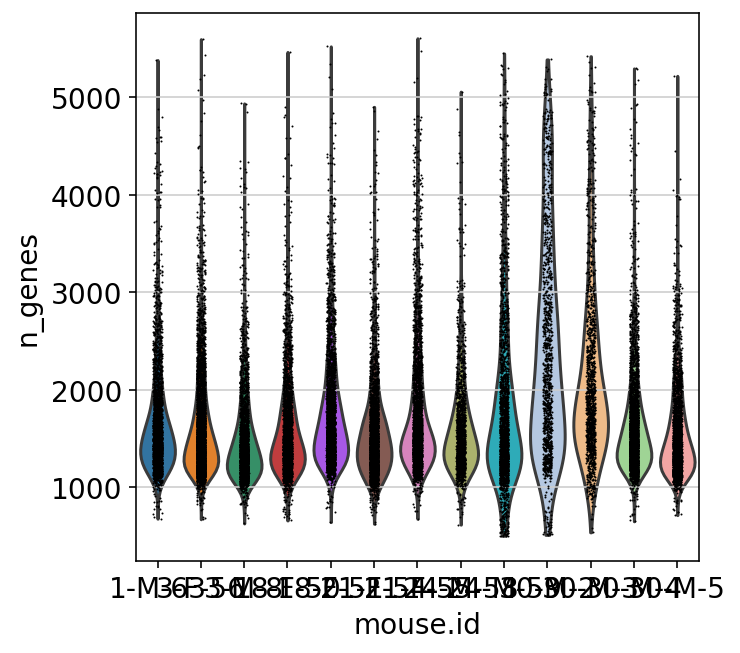

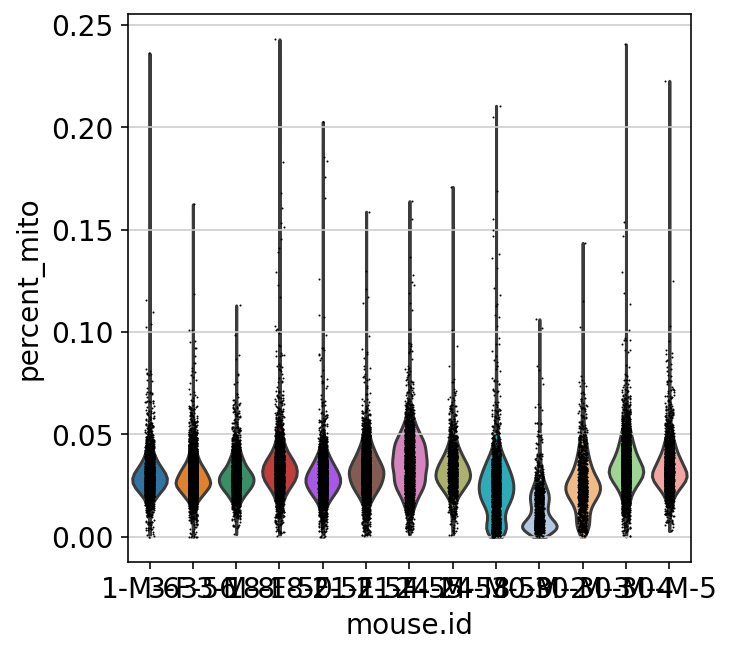

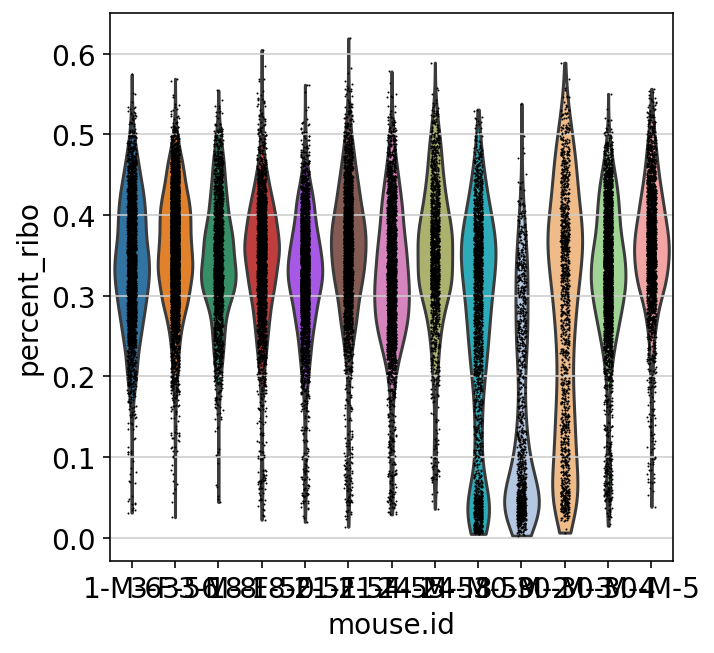

In [146]:
t1 = sc.pl.violin(adata, 'n_counts', groupby='mouse.id',size=1,  log=True, cut=0)
t = sc.pl.violin(adata, ['n_genes'], groupby ="mouse.id",show=False)
t2 = sc.pl.violin(adata, 'percent_mito', groupby='mouse.id')
t3 = sc.pl.violin(adata, ['percent_ribo'],  groupby ="mouse.id", show=False)

In [147]:
### these samples were contaminated, perhaps with blood cells
adata = adata[~adata.obs["mouse.id"].isin(['30-M-2','30-M-3','24-M-59'])]

add the total counts per cell as observations-annotation to adata

In [148]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata, min_cells=3)
print('Number of genes after cell filter: {:d}'.format(adata.n_vars))

Total number of genes: 30777
filtered out 12563 genes that are detected in less than 3 cells
Number of genes after cell filter: 18214


In [149]:
adata.obs['mouse.id'].value_counts()

3-F-56     4638
30-M-4     3335
21-F-55    3316
18-F-51    3149
1-M-63     2976
21-F-54    2936
18-F-50    2932
30-M-5     2694
3-M-8      2479
24-M-58    1629
Name: mouse.id, dtype: int64

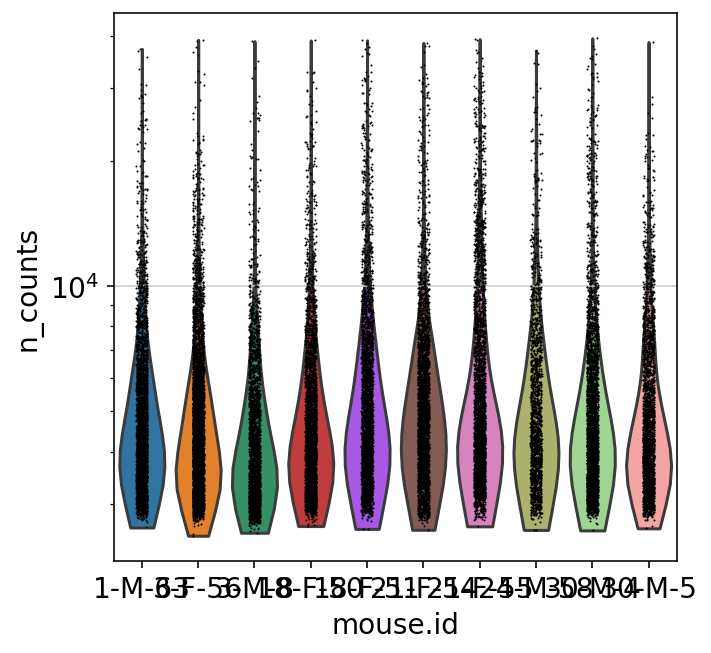

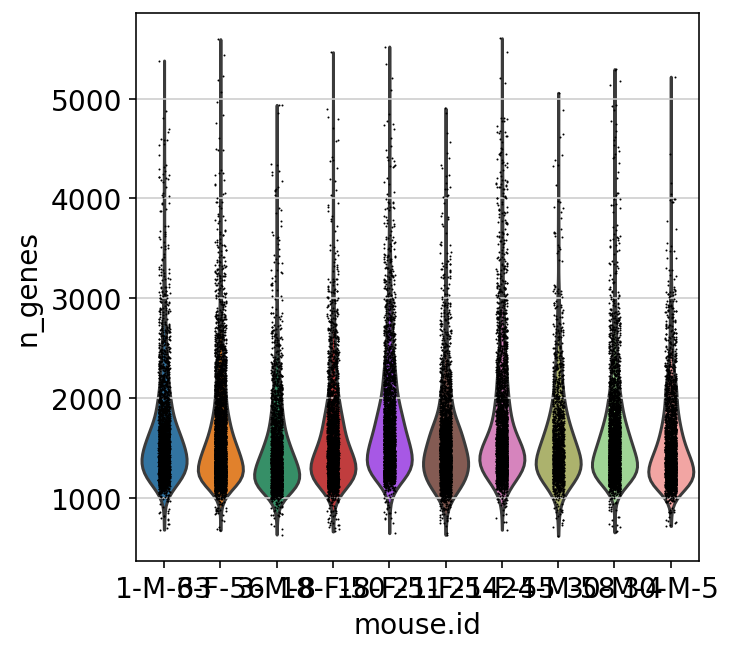

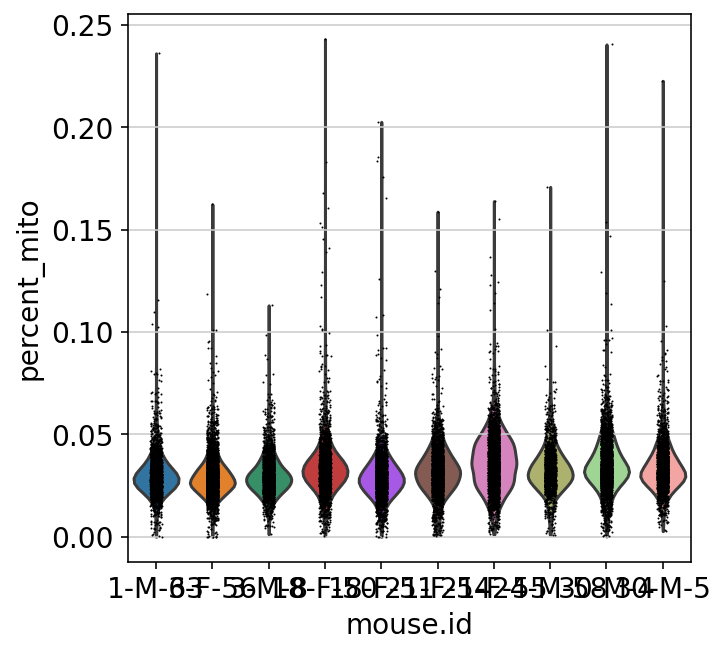

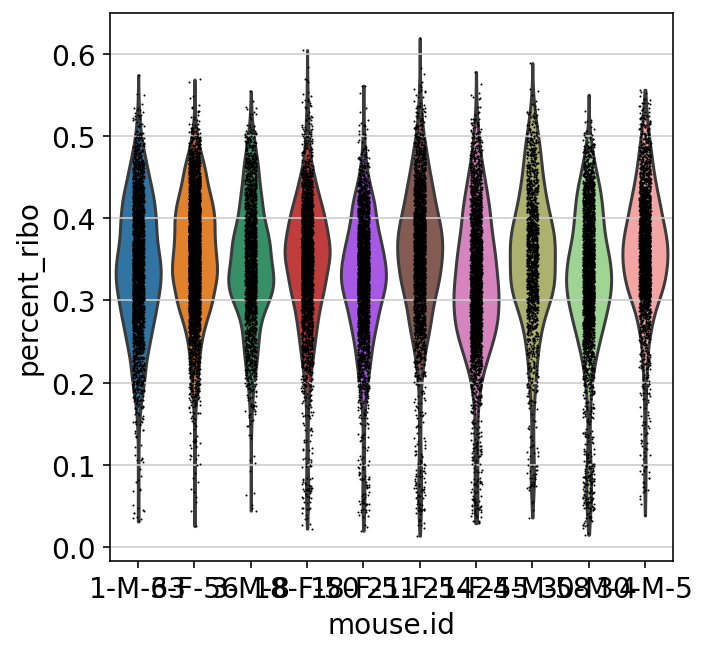

In [150]:
t1 = sc.pl.violin(adata, 'n_counts', groupby='mouse.id',size=1,  log=True, cut=0)
t = sc.pl.violin(adata, ['n_genes'], groupby ="mouse.id",show=False)
t2 = sc.pl.violin(adata, 'percent_mito', groupby='mouse.id')
t3 = sc.pl.violin(adata, ['percent_ribo'],  groupby ="mouse.id", show=False)

## STEP 5. Normalization


In [151]:
#Perform a clustering for scran normalization in clusters
adata_pp = adata.copy()
sc.pp.normalize_per_cell(adata_pp, counts_per_cell_after=1e6)
sc.pp.log1p(adata_pp)
sc.pp.pca(adata_pp, n_comps=15)
sc.pp.neighbors(adata_pp)
sc.tl.leiden(adata_pp, key_added='groups', resolution=0.5)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
computing PCA
    with n_comps=15
    finished (0:00:06)
computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
running Leiden clustering
    finished: found 16 clusters and added
    'groups', the cluster labels (adata.obs, categorical) (0:00:11)


In [152]:
#Preprocess variables for scran normalization
input_groups = adata_pp.obs['groups']
data_mat = adata.X.T

In [153]:
### there is a problen with the conversion rpy2 outputs to pandas, reload the next cell if the size-factor scran normalization is not working 

In [154]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
# Automatically convert rpy2 outputs to pandas dataframes
rpy2.robjects.numpy2ri.activate()
pandas2ri.activate()
anndata2ri.activate()
%reload_ext rpy2.ipython
# autoreload
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [155]:
%%R -i data_mat -i input_groups -o size_factors
library("scran")
library("SingleCellExperiment")
library("BiocGenerics")
size_factors = BiocGenerics::sizeFactors(scran::computeSumFactors(SingleCellExperiment::SingleCellExperiment(list(counts=data_mat)),clusters=input_groups, min.mean=0.1))

In [156]:
#Delete adata_pp
del adata_pp

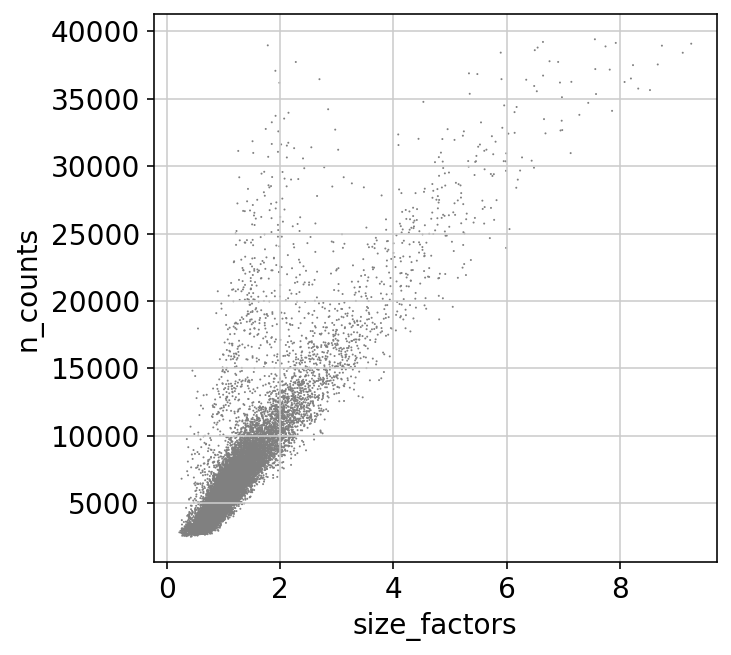

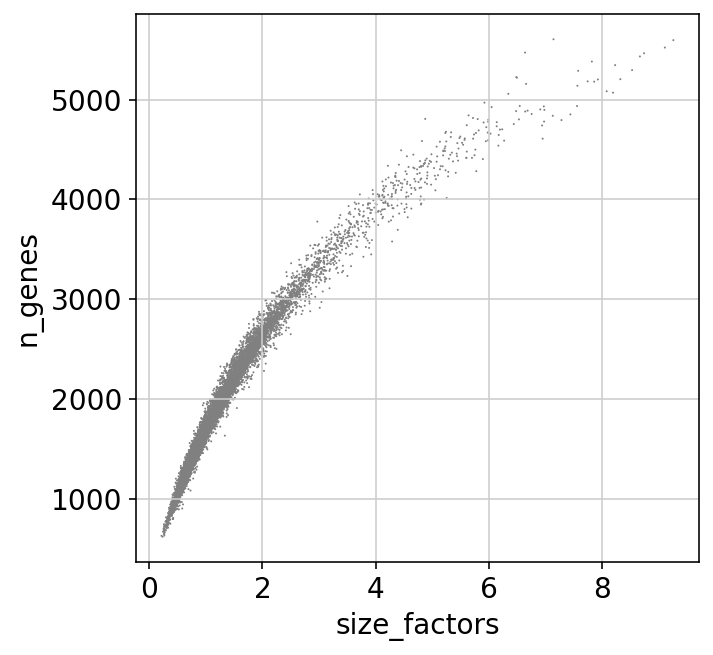

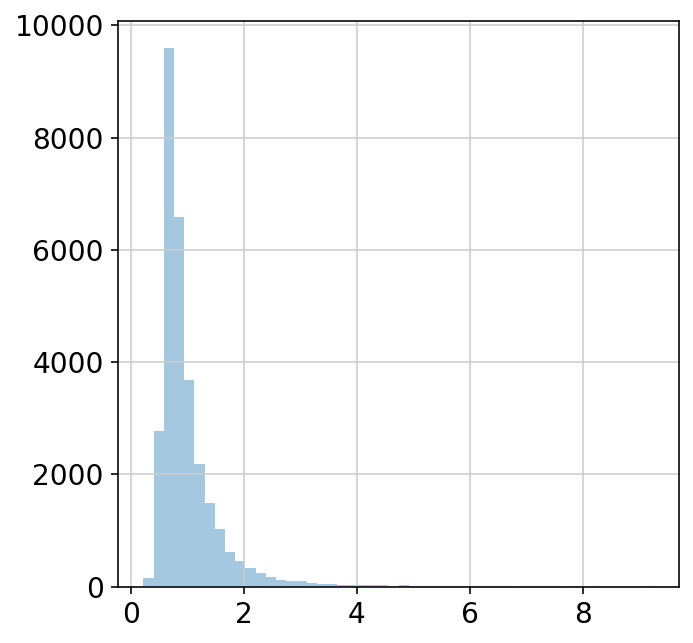

In [157]:
# Visualize the estimated size factors
adata.obs['size_factors'] = size_factors

sc.pl.scatter(adata, 'size_factors', 'n_counts')
sc.pl.scatter(adata, 'size_factors', 'n_genes')

sb.distplot(size_factors, bins=50, kde=False)
plt.show()

In [158]:
#Keep the count data in a counts layer
adata.layers["counts"] = adata.X.copy()

In [159]:
#Normalize adata 
adata.X /= adata.obs['size_factors'].values[:,None]
sc.pp.log1p(adata)

In [114]:
adata.X

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 1.28430942, 0.        , ..., 0.83555185, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.6992825 ,
         0.        ],
        ...,
        [0.        , 0.80025838, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.50665746, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.43087639,
         0.        ]])

In [160]:
adata.X = np.squeeze(np.asarray(adata.X))

In [161]:
adata.X.astype(int)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
# Store the full data set in 'raw' as log-normalised data for statistical testing
#adata.raw = adata

In [47]:
adata.obs.head()


filenames  \
X                                                                               
AAACCTGAGCACCGCT-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_primirs   
AAACCTGAGCCTTGAT-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_primirs   
AAACCTGCAACACGCC-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_primirs   
AAACCTGCACTGCCAG-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_primirs   
AAACCTGCAGACTCGC-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_primirs   

                                                                              newnames  \
X                                                                                        
AAACCTGAGCACCGCT-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_AAACCTGAGCACCGCT   
AAACCTGAGCCTTGAT-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_AAACCTGAGCCTTGAT   
AAACCTGCAACACGCC-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_AAACCTGCAACACGCC   
AAACCTGCACTGCCAG-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_AAACCTGCACTGCCAG   
AAACCTGCAGACTCGC-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_AAACCTGCAGACTCGC   

                                                             cell  \
X                                                                   
AAACCTGAGCACCGCT-1-MACA_18m_F_SPLEEN_51_primirs  AAACCTGAGCACCGCT   
AAACCTGAGCCTTGAT-1-MACA_18m_F_SPLEEN_51_primirs  AAACCTGAGCCTTGAT   
AAACCTGCAACACGCC-1-MACA_18m_F_SPLEEN_51_primirs  AAACCTGCAACACGCC   
AAACCTGCACTGCCAG-1-MACA_18m_F_SPLEEN_51_primirs  AAACCTGCACTGCCAG   
AAACCTGCAGACTCGC-1-MACA_18m_F_SPLEEN_51_primirs  AAACCTGCAGACTCGC   

                                                                group  age  \
X                                                                            
AAACCTGAGCACCGCT-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51  18m   
AAACCTGAGCCTTGAT-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51  18m   
AAACCTGCAACACGCC-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51  18m   
AAACCTGCACTGCCAG-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51  18m   
AAACCTGCAGACTCGC-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51  18m   

                                                cell_ontology_class mouse.id  \
X                                                                              
AAACCTGAGCACCGCT-1-MACA_18m_F_SPLEEN_51_primirs              B cell  18-F-51   
AAACCTGAGCCTTGAT-1-MACA_18m_F_SPLEEN_51_primirs              T cell  18-F-51   
AAACCTGCAACACGCC-1-MACA_18m_F_SPLEEN_51_primirs              T cell  18-F-51   
AAACCTGCACTGCCAG-1-MACA_18m_F_SPLEEN_51_primirs    mature NK T cell  18-F-51   
AAACCTGCAGACTCGC-1-MACA_18m_F_SPLEEN_51_primirs              B cell  18-F-51   

                                                 n_genes     sex  tissue  \
X                                                                          
AAACCTGAGCACCGCT-1-MACA_18m_F_SPLEEN_51_primirs      929  female  Spleen   
AAACCTGAGCCTTGAT-1-MACA_18m_F_SPLEEN_51_primirs     1410  female  Spleen   
AAACCTGCAACACGCC-1-MACA_18m_F_SPLEEN_51_primirs     1705  female  Spleen   
AAACCTGCACTGCCAG-1-MACA_18m_F_SPLEEN_51_primirs     1840  female  Spleen   
AAACCTGCAGACTCGC-1-MACA_18m_F_SPLEEN_51_primirs     1955  female  Spleen   

                                                 n_counts  louvain  leiden  \
X                                                                            
AAACCTGAGCACCGCT-1-MACA_18m_F_SPLEEN_51_primirs    3428.0        3      15   
AAACCTGAGCCTTGAT-1-MACA_18m_F_SPLEEN_51_primirs    4086.0        5       2   
AAACCTGCAACACGCC-1-MACA_18m_F_SPLEEN_51_primirs    4180.0        4       9   
AAACCTGCACTGCCAG-1-MACA_18m_F_SPLEEN_51_primirs    5168.0        5       8   
AAACCTGCAGACTCGC-1-MACA_18m_F_SPLEEN_51_primirs    6250.0        2       4   

                                                 percent_mito  percent_ribo  \
X                                                                             
AAACCTGAGCACCGCT-1-MACA_18m_F_SPLEEN_51

## STEP 6. Peform this if you have a batch effect


In [162]:
sc.pp.combat(adata, key='mouse.id')

Standardizing Data across genes.

Found 10 batches

Found 0 numerical variables:
	

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting data



## STEP 7. Find high variable genes

In [163]:
sc.pp.highly_variable_genes(adata)

extracting highly variable genes
    finished (0:00:05)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


## STEP 8. Data exploration

### PCA

In [164]:
sc.tl.pca(adata,use_highly_variable=True)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)


In [165]:
adata.obs

filenames  \
X                                                                               
AAACCTGAGCACCGCT-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_primirs   
AAACCTGAGCCTTGAT-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_primirs   
AAACCTGCAACACGCC-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_primirs   
AAACCTGCACTGCCAG-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_primirs   
AAACCTGCAGACTCGC-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_primirs   
...                                                                       ...   
TTTGTCACAGCTCGAC-1-10X_P5_11_primirs                        10X_P5_11_primirs   
TTTGTCACAGCTCGCA-1-10X_P5_11_primirs                        10X_P5_11_primirs   
TTTGTCAGTCATCGGC-1-10X_P5_11_primirs                        10X_P5_11_primirs   
TTTGTCATCGCCTGAG-1-10X_P5_11_primirs                        10X_P5_11_primirs   
TTTGTCATCTACTTAC-1-10X_P5_11_primirs                        10X_P5_11_primirs   

                                                                              newnames  \
X                                                                                        
AAACCTGAGCACCGCT-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_AAACCTGAGCACCGCT   
AAACCTGAGCCTTGAT-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_AAACCTGAGCCTTGAT   
AAACCTGCAACACGCC-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_AAACCTGCAACACGCC   
AAACCTGCACTGCCAG-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_AAACCTGCACTGCCAG   
AAACCTGCAGACTCGC-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51_AAACCTGCAGACTCGC   
...                                                                                ...   
TTTGTCACAGCTCGAC-1-10X_P5_11_primirs                        10X_P5_11_TTTGTCACAGCTCGAC   
TTTGTCACAGCTCGCA-1-10X_P5_11_primirs                        10X_P5_11_TTTGTCACAGCTCGCA   
TTTGTCAGTCATCGGC-1-10X_P5_11_primirs                        10X_P5_11_TTTGTCAGTCATCGGC   
TTTGTCATCGCCTGAG-1-10X_P5_11_primirs                        10X_P5_11_TTTGTCATCGCCTGAG   
TTTGTCATCTACTTAC-1-10X_P5_11_primirs                        10X_P5_11_TTTGTCATCTACTTAC   

                                                             cell  \
X                                                                   
AAACCTGAGCACCGCT-1-MACA_18m_F_SPLEEN_51_primirs  AAACCTGAGCACCGCT   
AAACCTGAGCCTTGAT-1-MACA_18m_F_SPLEEN_51_primirs  AAACCTGAGCCTTGAT   
AAACCTGCAACACGCC-1-MACA_18m_F_SPLEEN_51_primirs  AAACCTGCAACACGCC   
AAACCTGCACTGCCAG-1-MACA_18m_F_SPLEEN_51_primirs  AAACCTGCACTGCCAG   
AAACCTGCAGACTCGC-1-MACA_18m_F_SPLEEN_51_primirs  AAACCTGCAGACTCGC   
...                                                           ...   
TTTGTCACAGCTCGAC-1-10X_P5_11_primirs             TTTGTCACAGCTCGAC   
TTTGTCACAGCTCGCA-1-10X_P5_11_primirs             TTTGTCACAGCTCGCA   
TTTGTCAGTCATCGGC-1-10X_P5_11_primirs             TTTGTCAGTCATCGGC   
TTTGTCATCGCCTGAG-1-10X_P5_11_primirs             TTTGTCATCGCCTGAG   
TTTGTCATCTACTTAC-1-10X_P5_11_primirs             TTTGTCATCTACTTAC   

                                                                group  age  \
X                                                                            
AAACCTGAGCACCGCT-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51  18m   
AAACCTGAGCCTTGAT-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51  18m   
AAACCTGCAACACGCC-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51  18m   
AAACCTGCACTGCCAG-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51  18m   
AAACCTGCAGACTCGC-1-MACA_18m_F_SPLEEN_51_primirs  MACA_18m_F_SPLEEN_51  18m   
...                                                               ...  ...   
TTTGTCACAGCTCGAC-1-10X_P5_11_primirs                        10X_P5_11   1m   
TTTGTCACAGCTCGCA-1-10X_P5_11_primirs                        10X_P5_11   1m   
TTTGTCAGTCATCGGC-1-10X_P5_11_primirs                        10X_P5_11   1m   
TTTGTCATCGCCTGAG-1-10X_P5_11_primirs                        10X_P5_11   1m   
TTTGTCATC

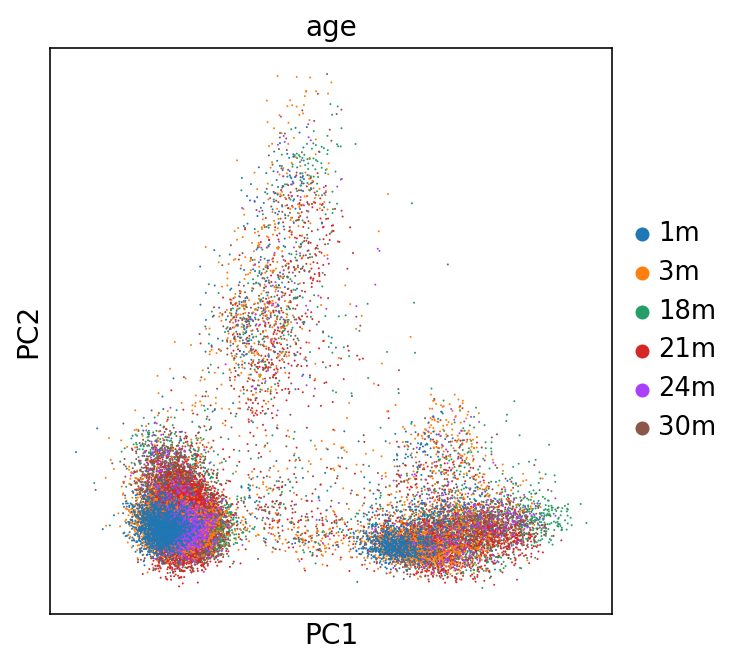

In [166]:
sc.pl.pca_scatter(adata, color=['age'])

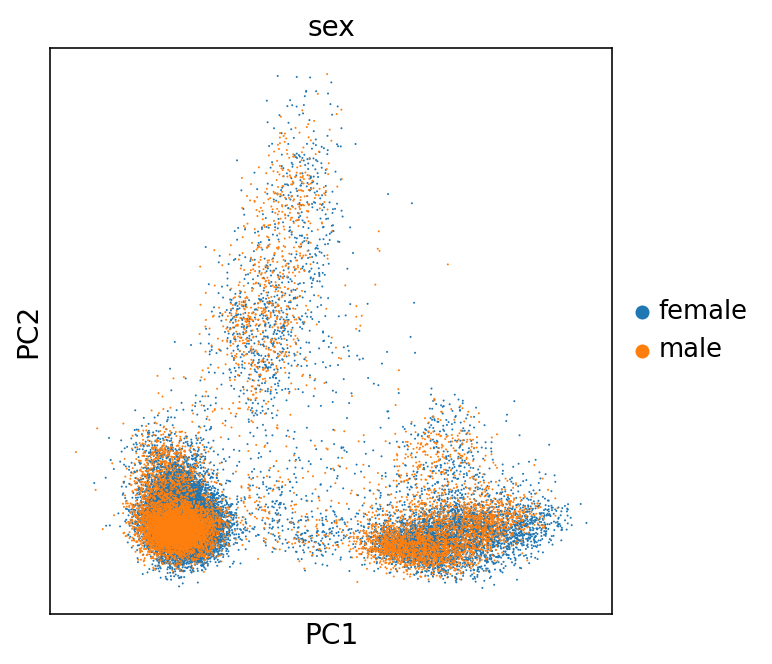

In [167]:
sc.pl.pca_scatter(adata, color=['sex'])

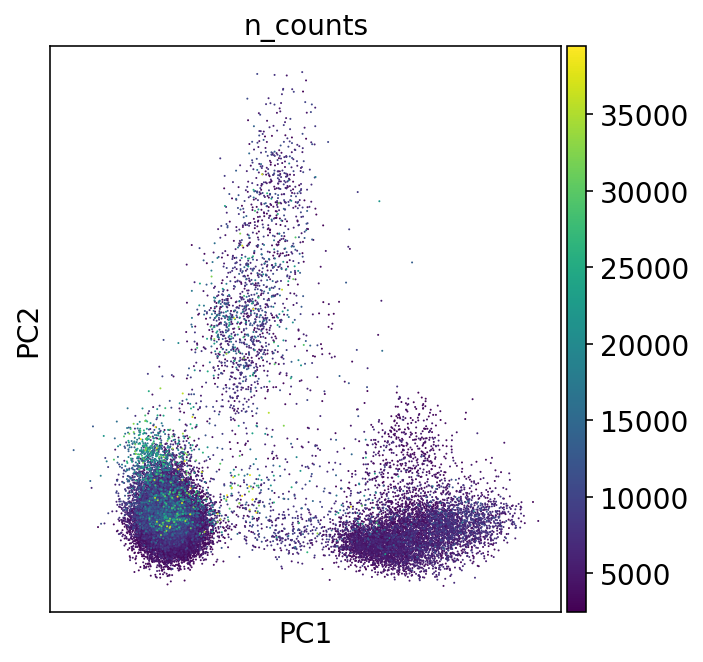

In [168]:
sc.pl.pca_scatter(adata, color='n_counts')

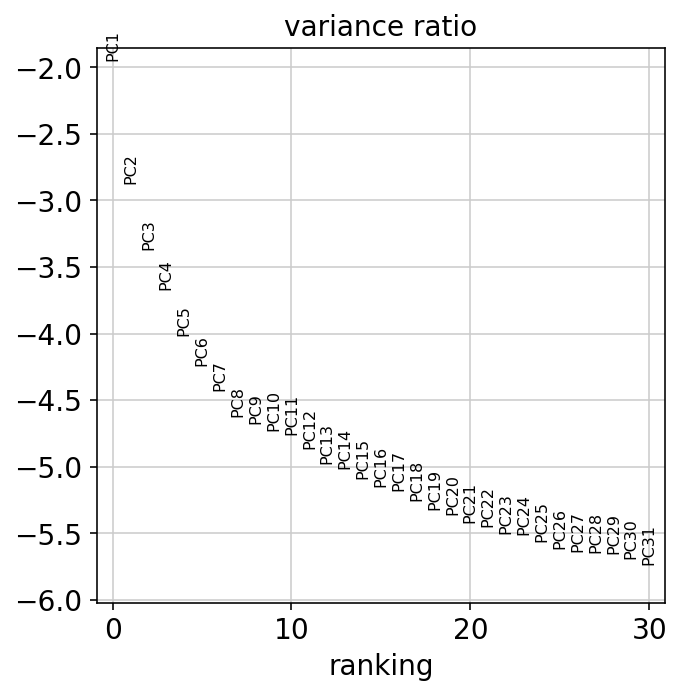

In [169]:
sc.pl.pca_variance_ratio(adata, log=True)

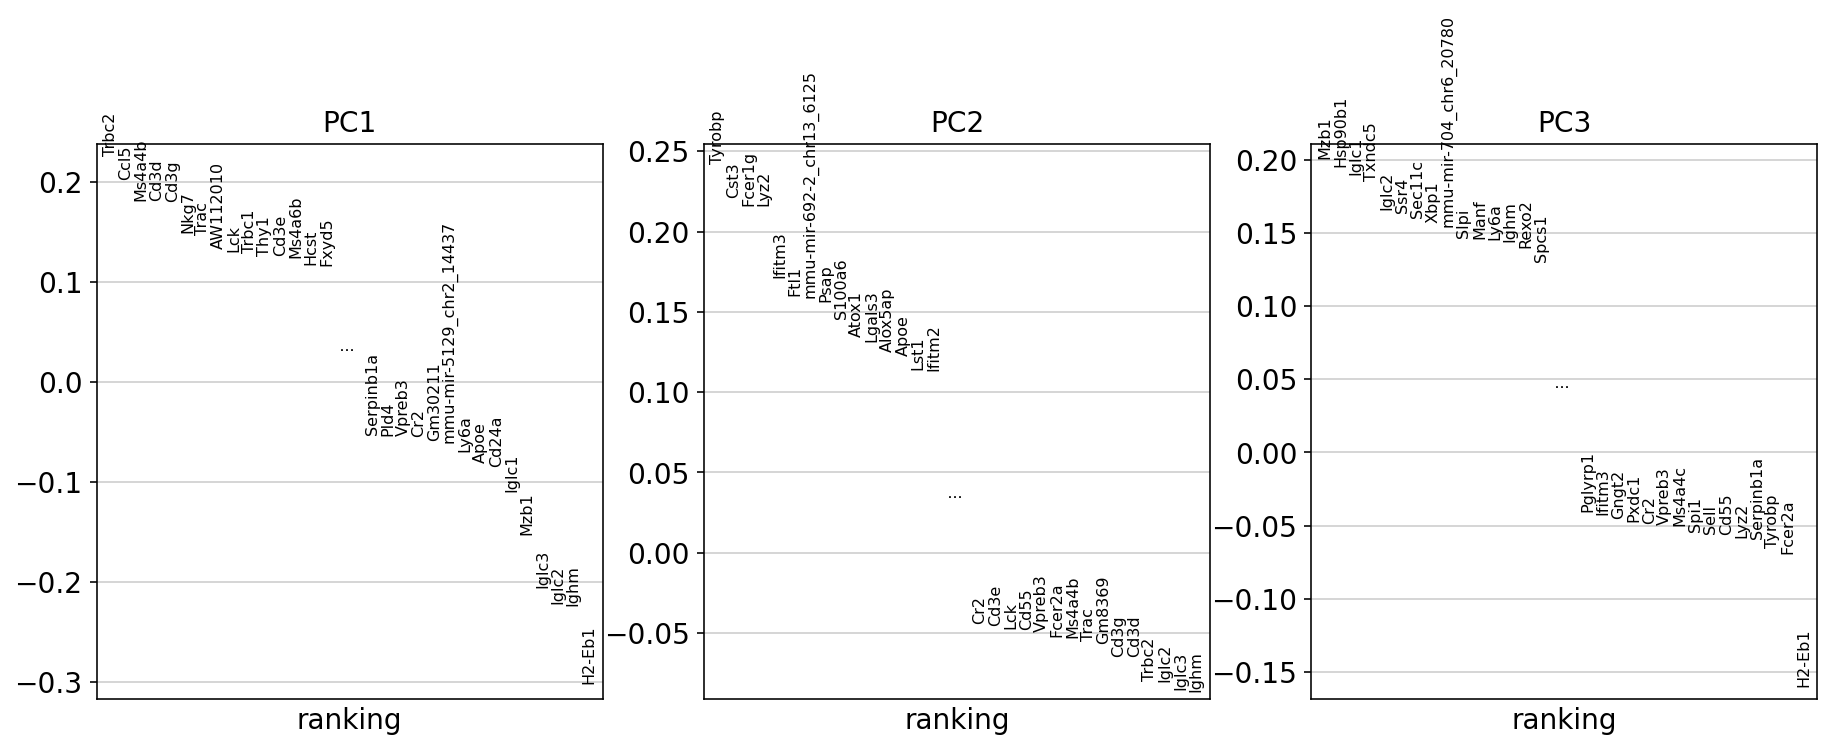

In [170]:
sc.pl.pca_loadings(adata)

### Clustering

In [171]:
sc.pp.neighbors(adata, n_neighbors=12)#, method='gauss')


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [172]:
sc.tl.leiden(adata, resolution = 0.5)


running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:18)


### UMAP

In [173]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:21)


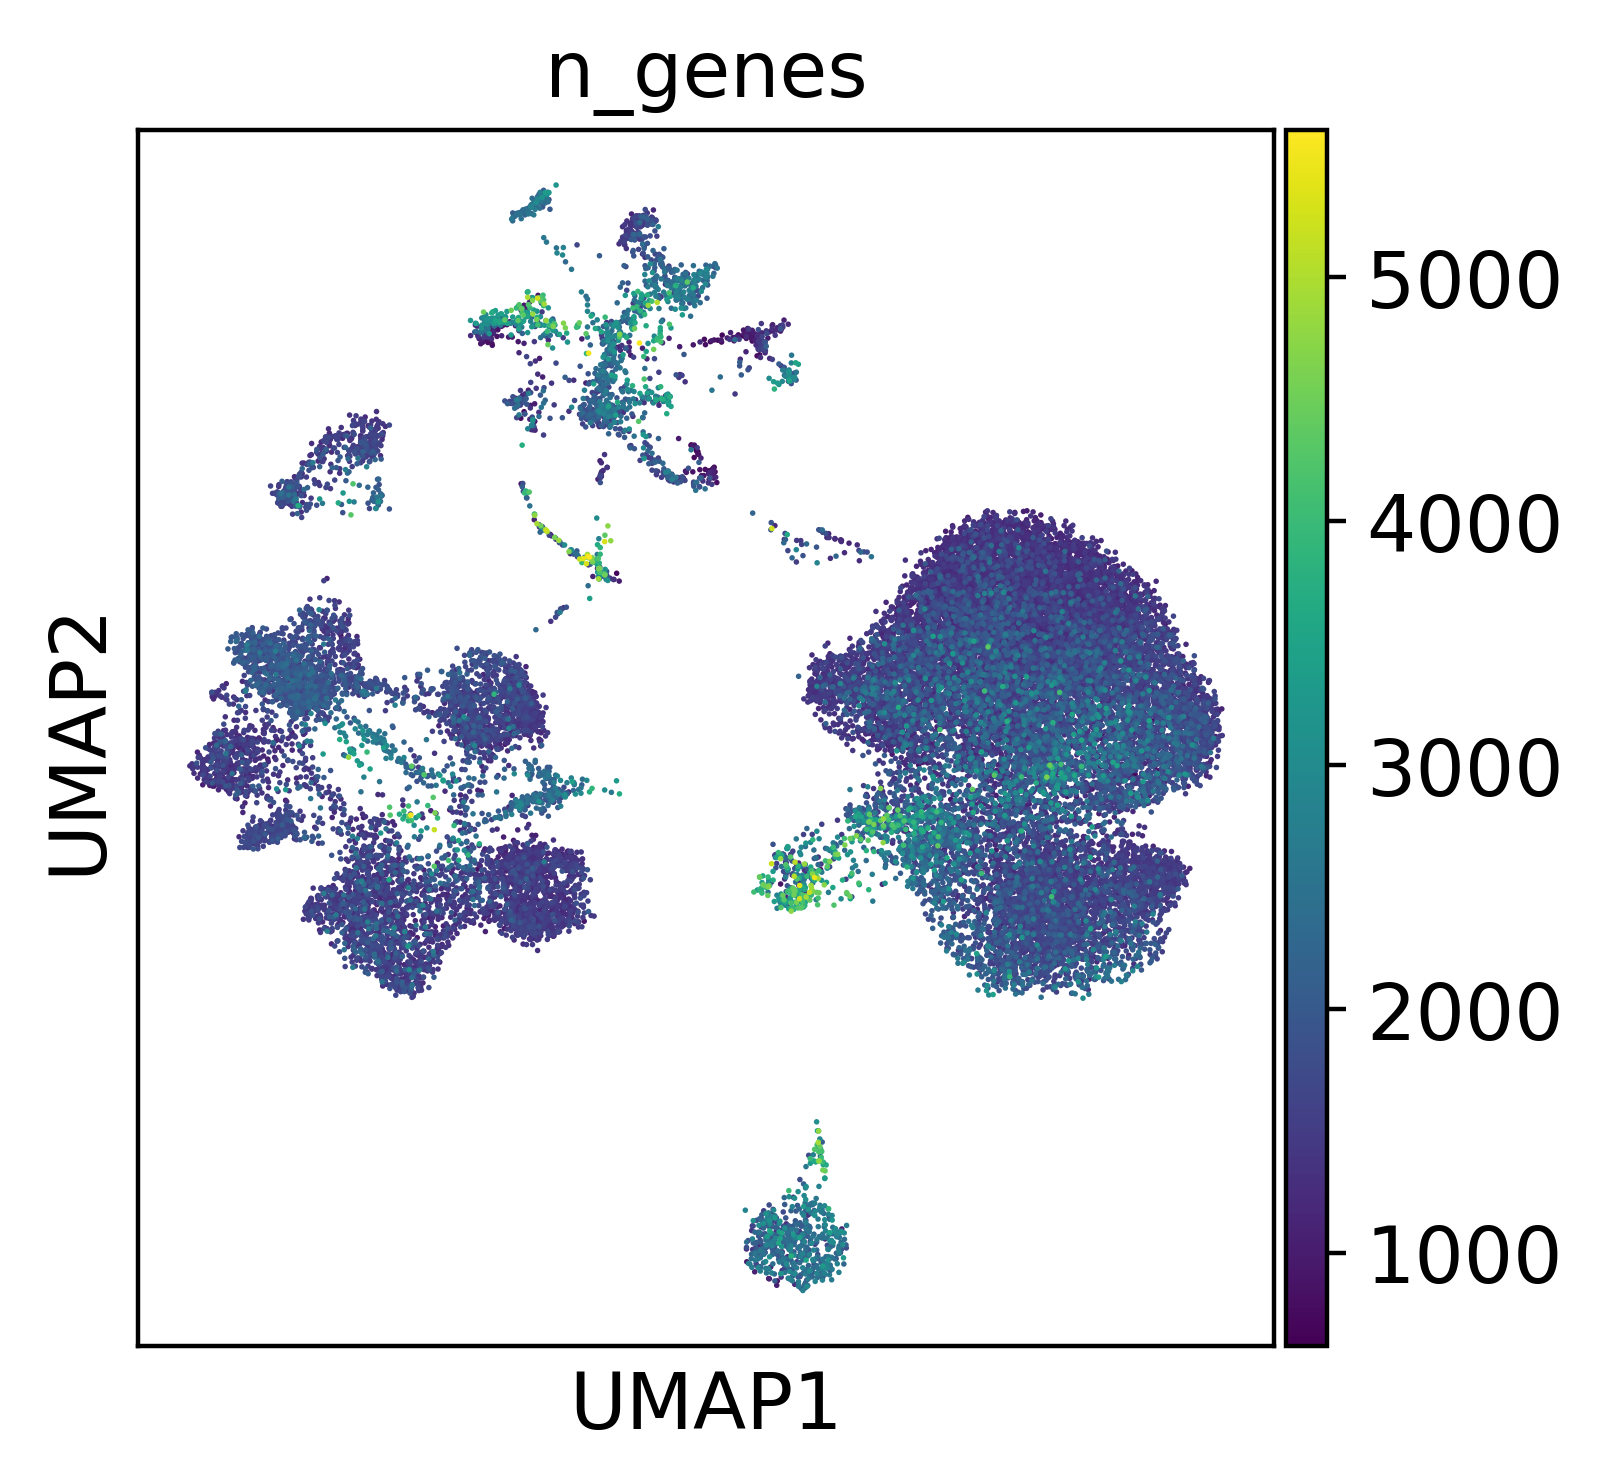

In [174]:
sc.settings.set_figure_params(dpi=200)
sc.pl.umap(adata, color=['n_genes'])

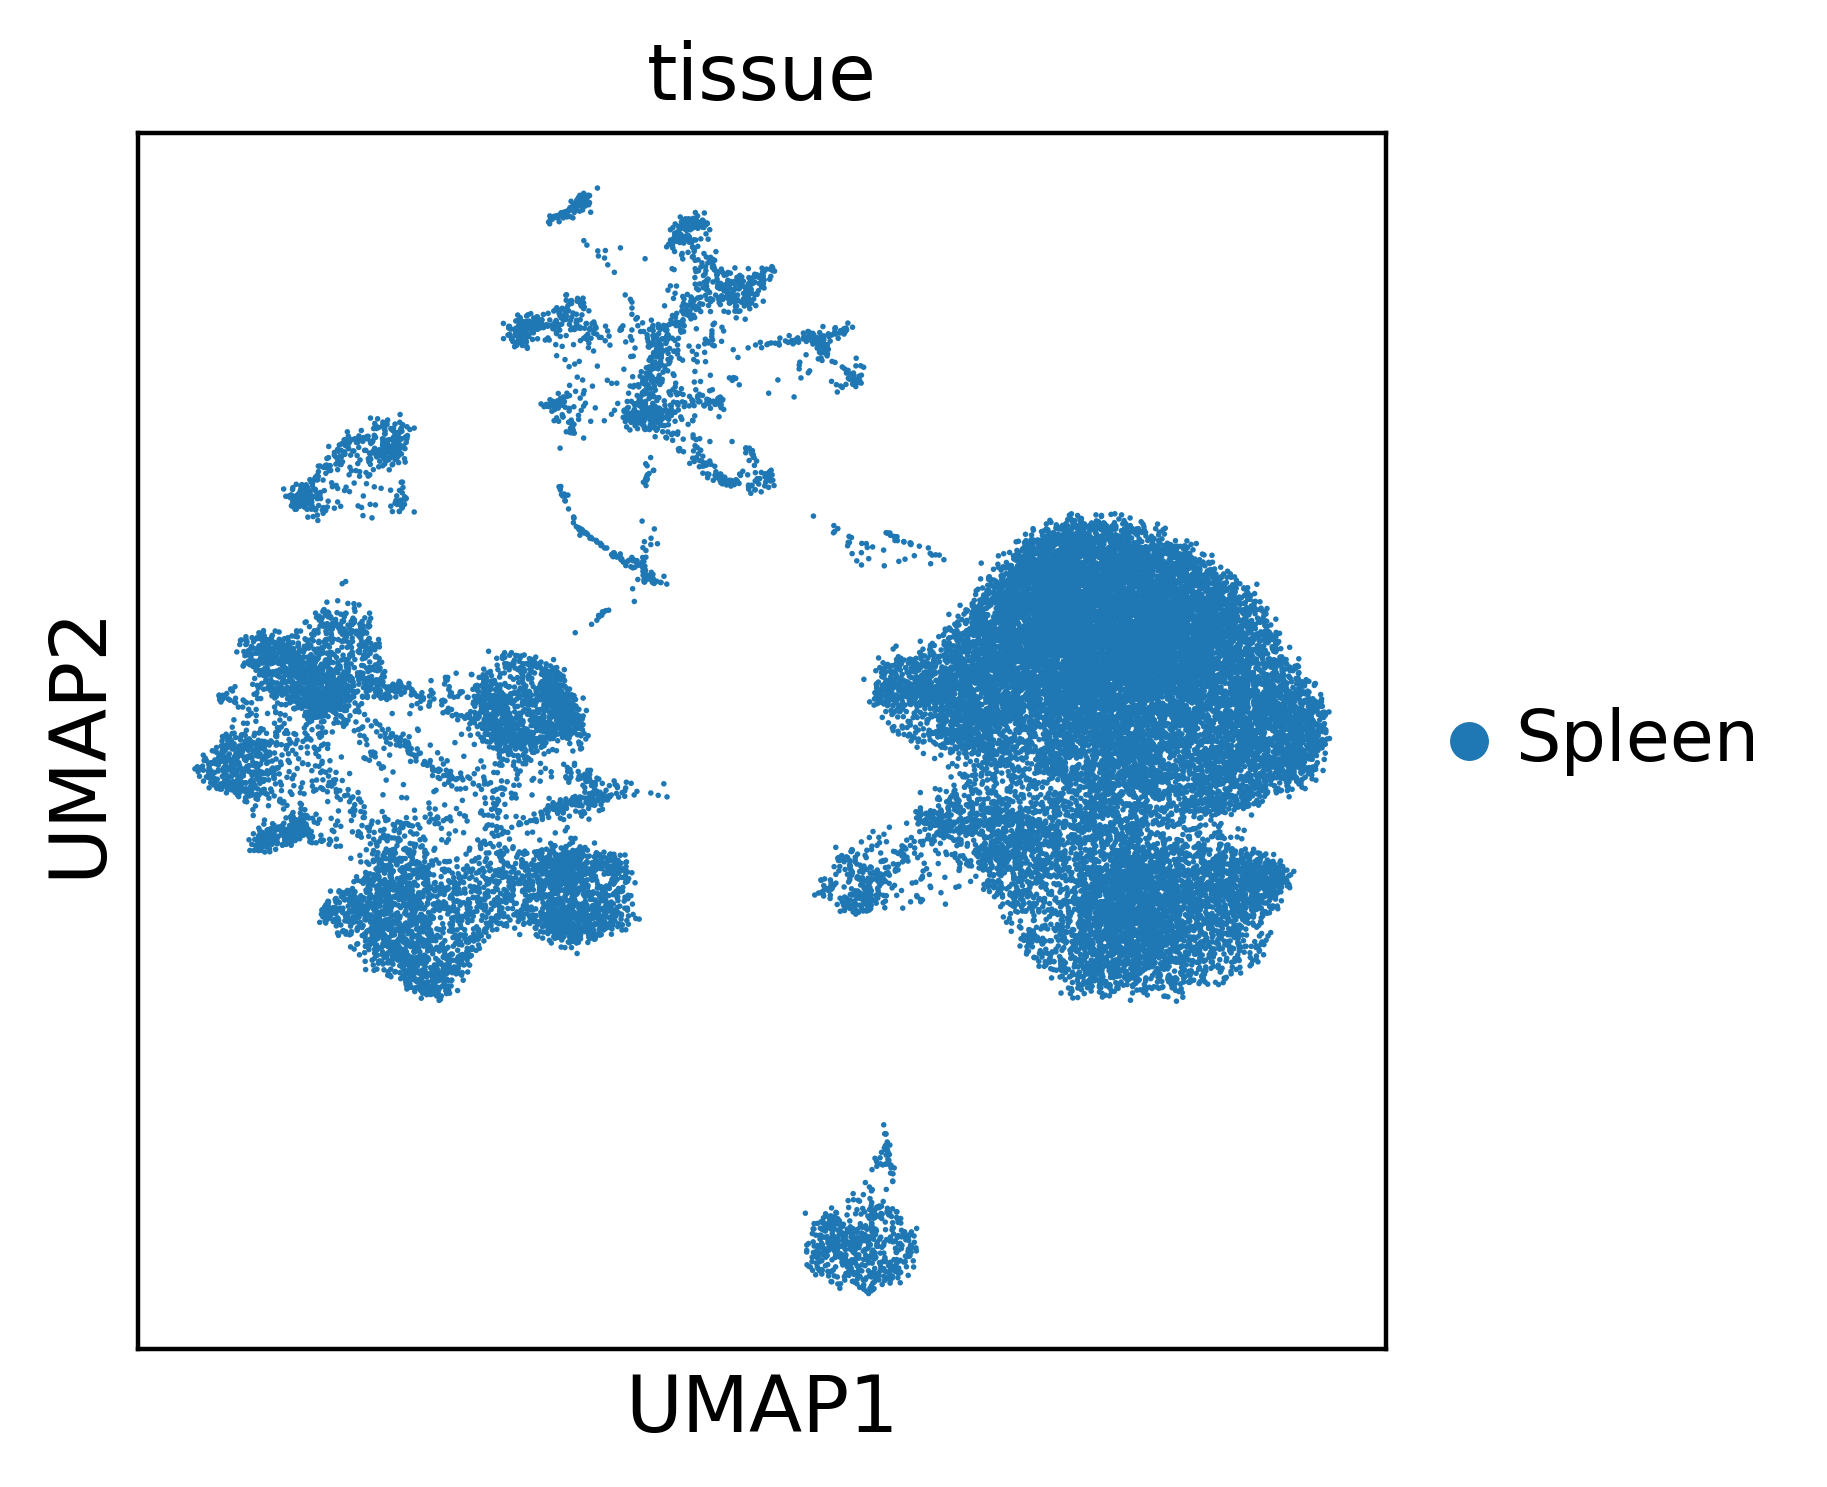

In [175]:
sc.settings.set_figure_params(dpi=200)
sc.pl.umap(adata, color=['tissue'])

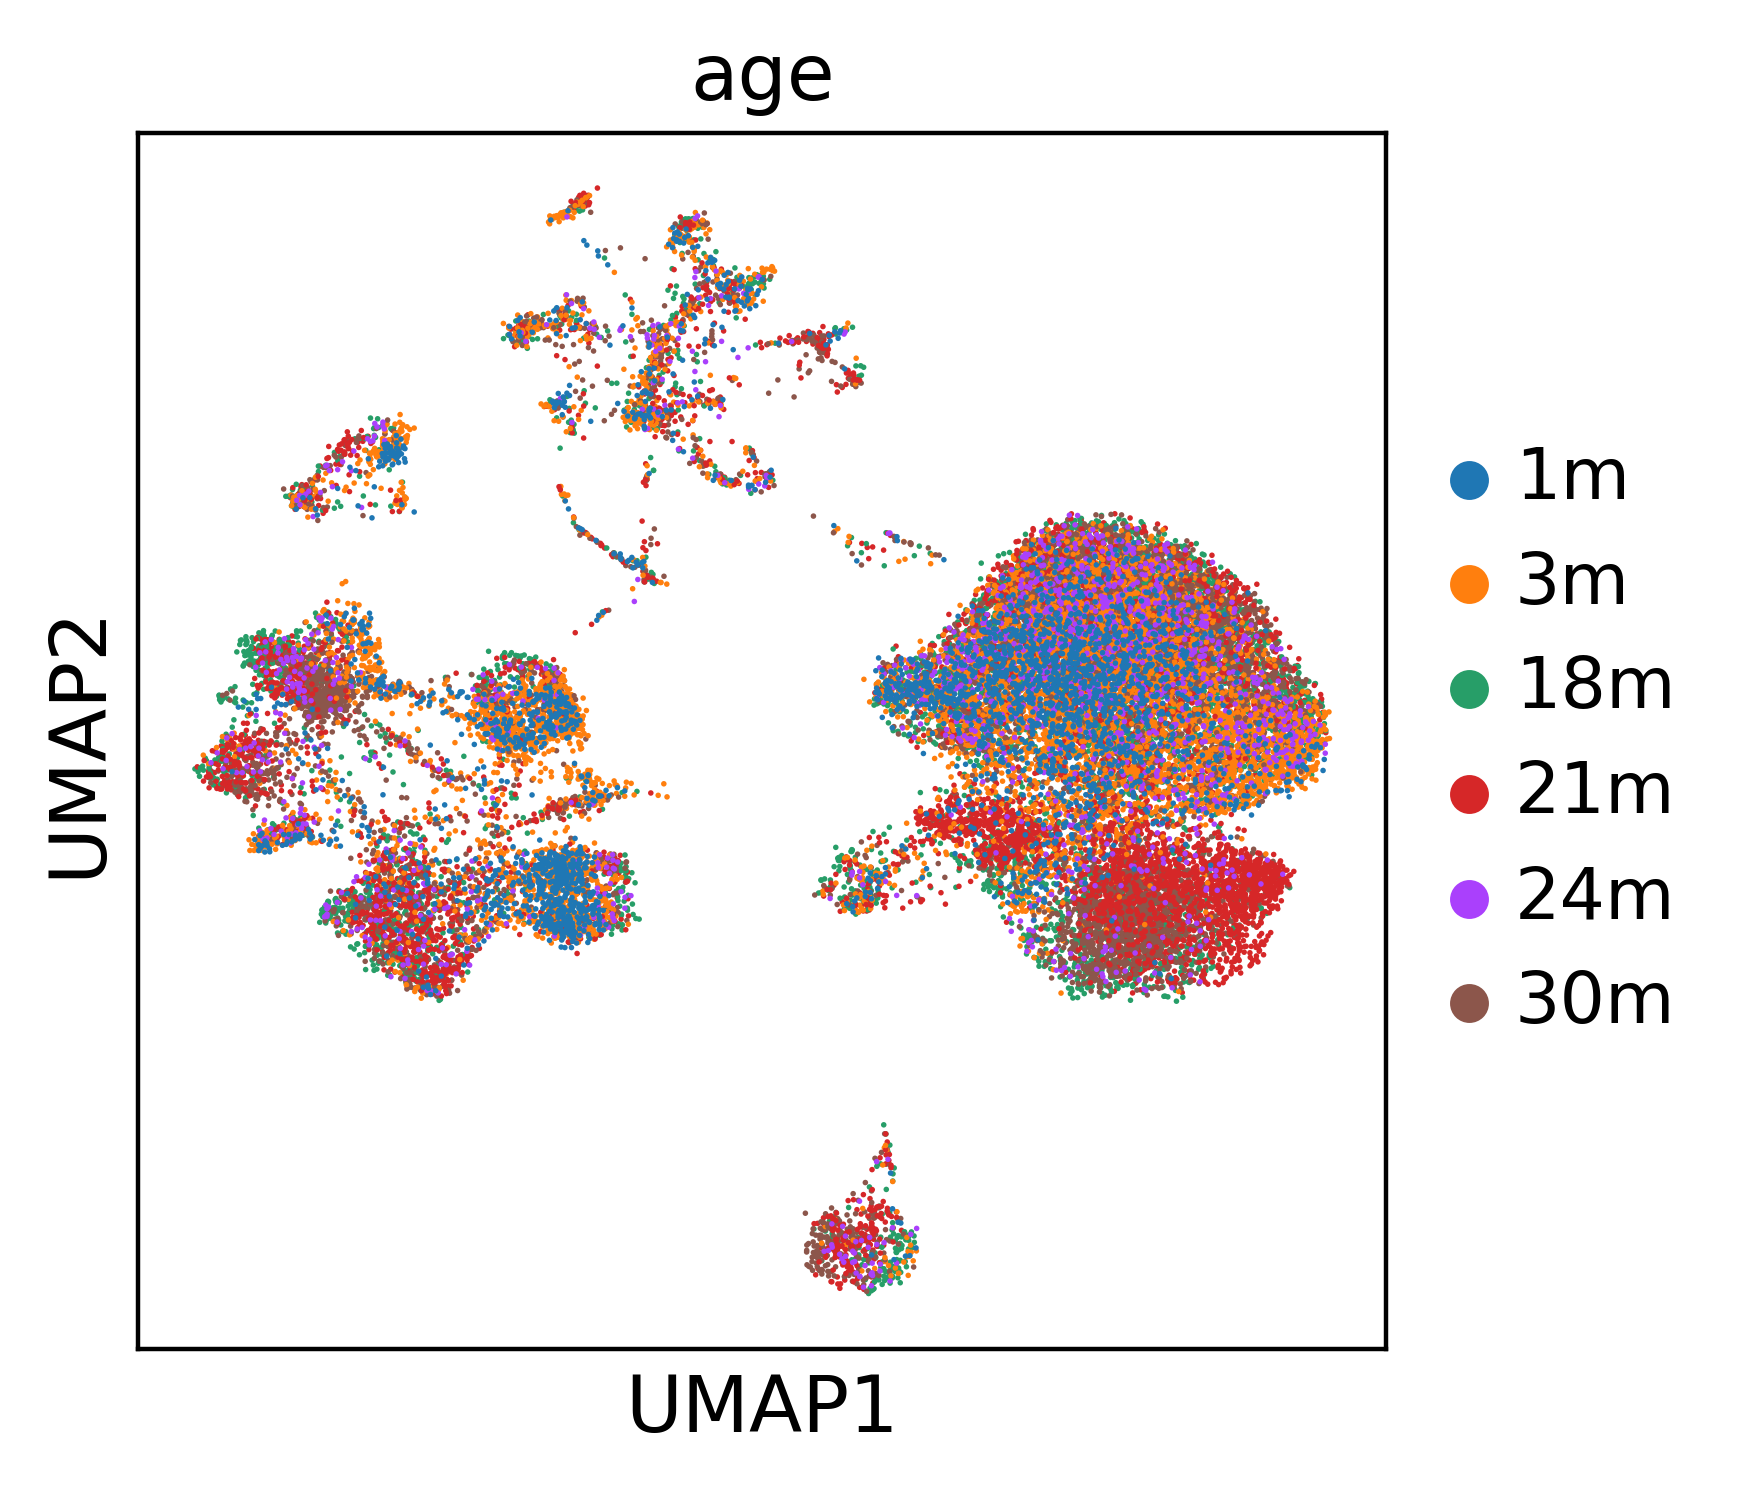

In [176]:
#sc.settings.set_figure_params(dpi=200)
sc.pl.umap(adata, color=['age'])

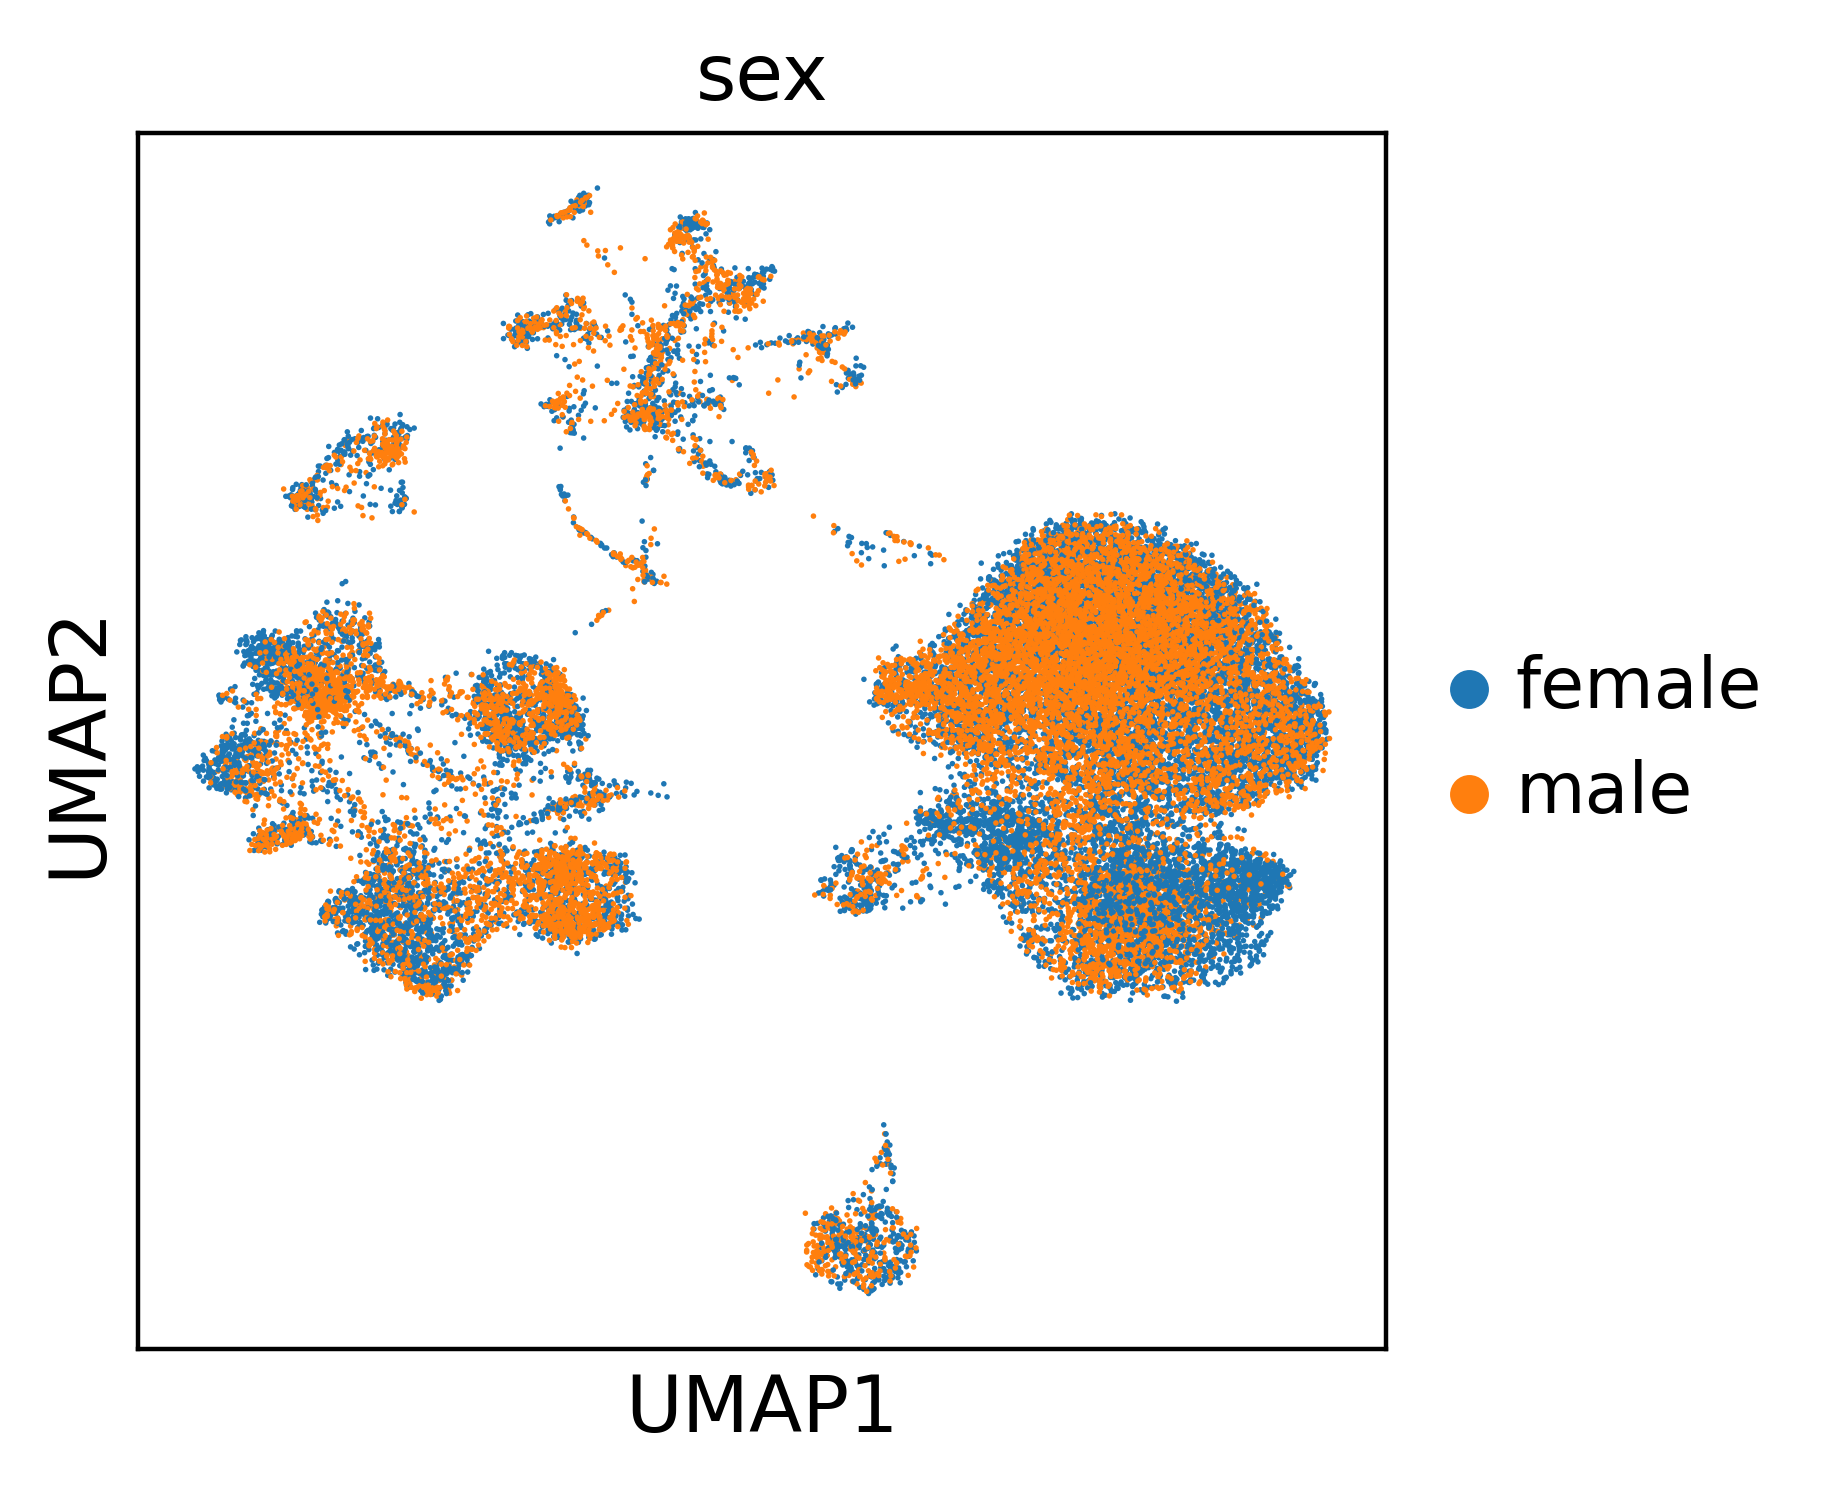

In [177]:
sc.settings.set_figure_params(dpi=200)
sc.pl.umap(adata, color=['sex'])

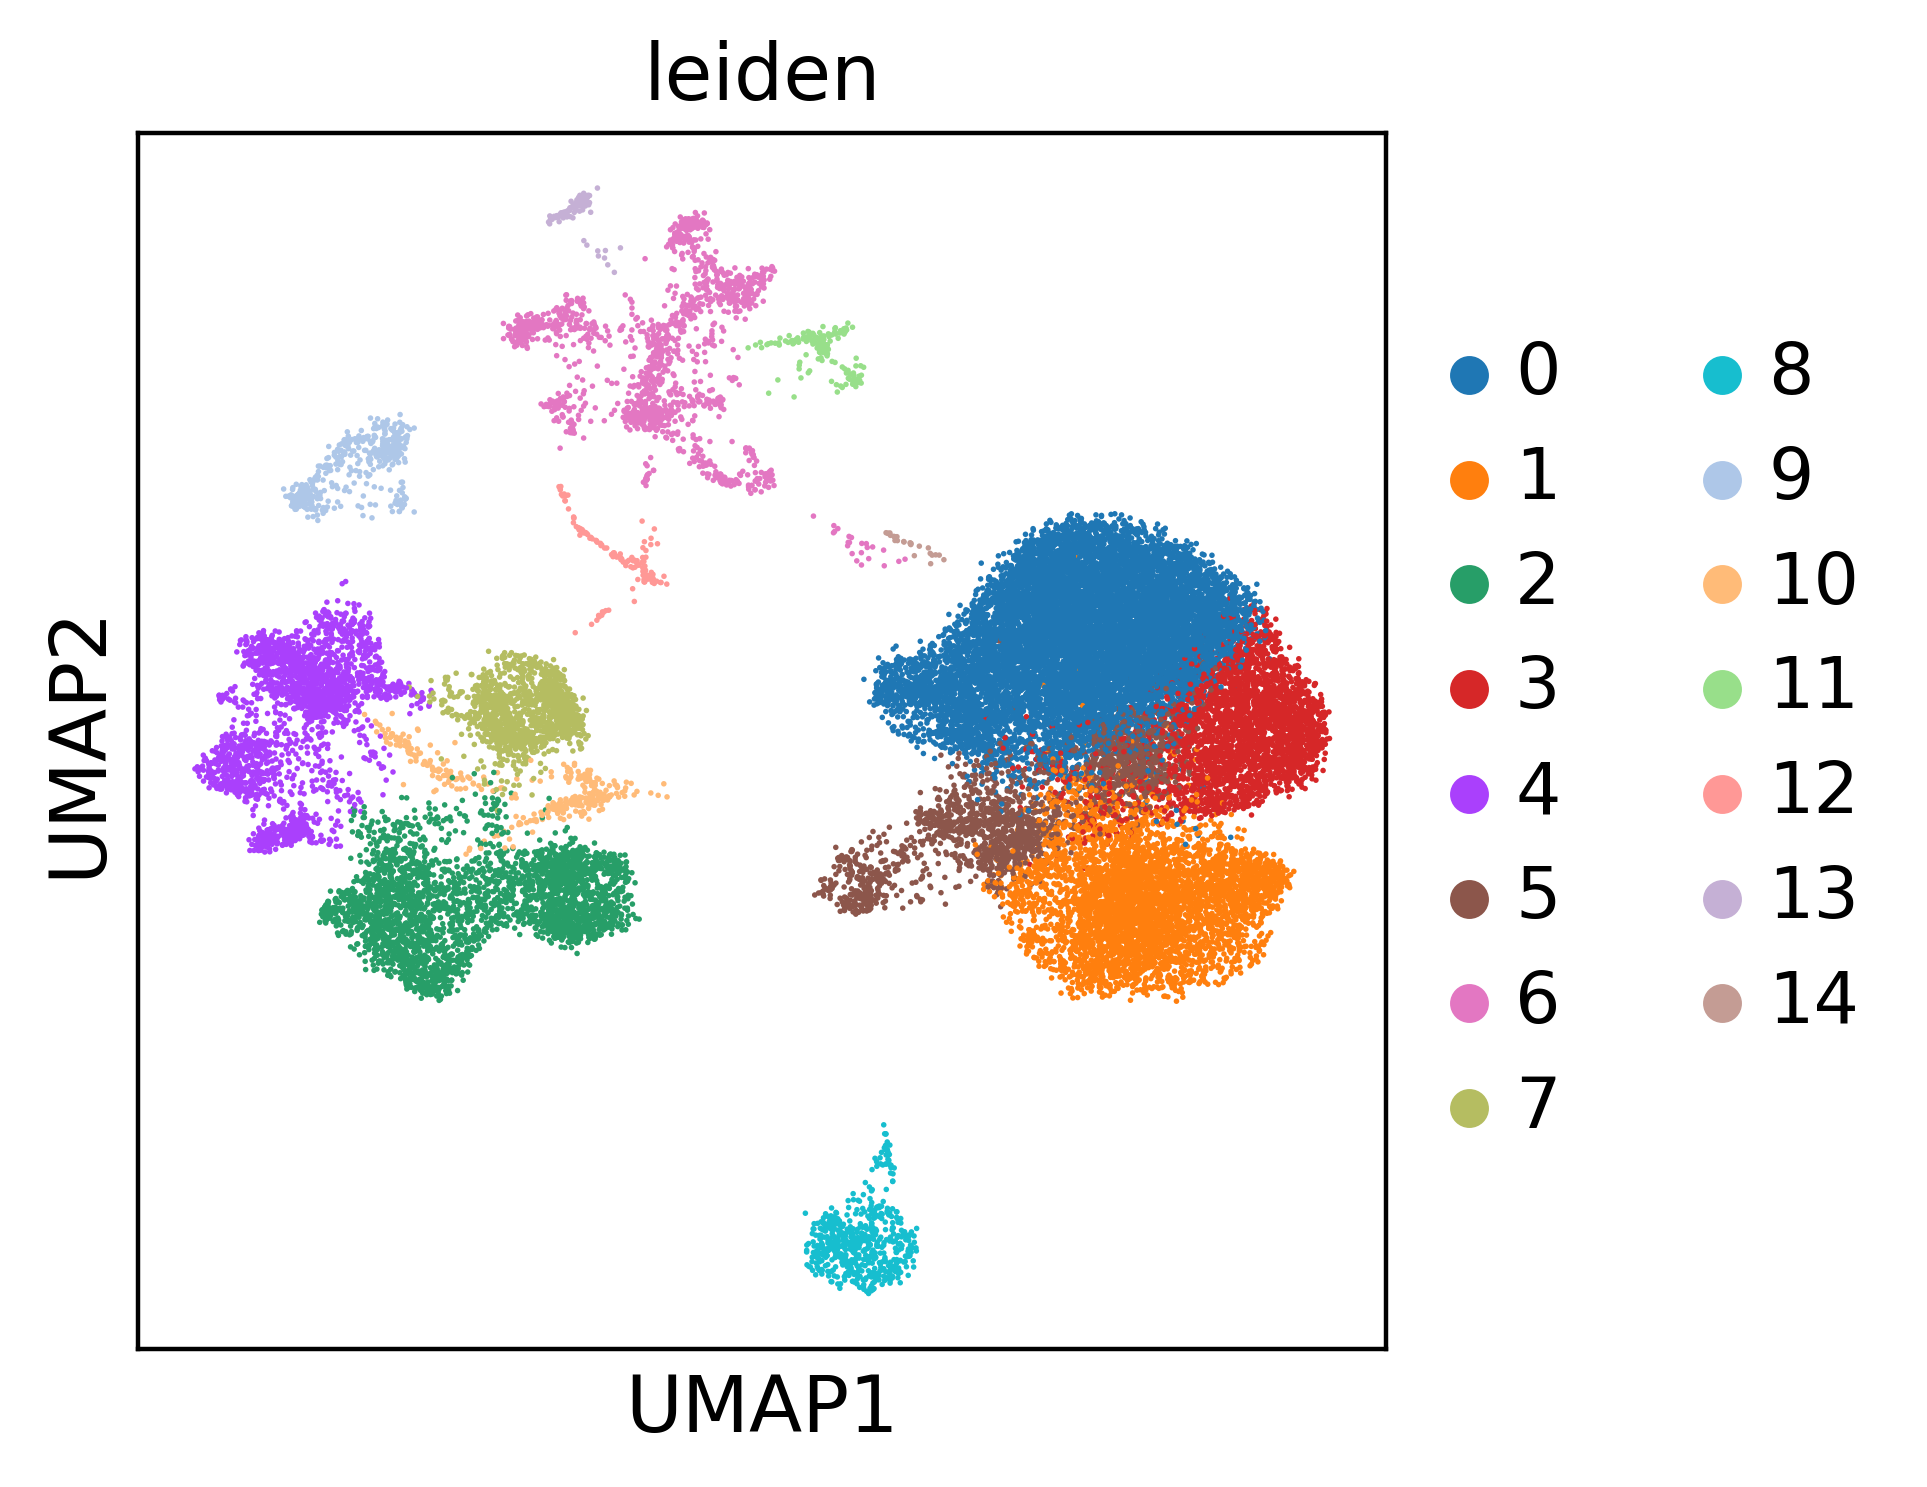

In [178]:
sc.settings.set_figure_params(dpi=200)
sc.pl.umap(adata, color=['leiden'])

## STEP 7. Write pre-processed object

In [179]:
path2output="path to store your preprocessed files"

In [186]:
file = path2output+ selTissue+'_10x-preprocessed'

In [187]:
file

'/research/groups/bioinformaticians/internship/celtundi/ana_work/Spleen_10x-pre-processed'

In [188]:
adata.write(file+'.h5ad')
adata.write_loom(file+'.loom',write_obsm_varm=True)